Figure 2.21. Fitting a single multivariate Gaussian or GMM (n = 2) on 'old faithful' data.

In [1]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Load and plot data

In [2]:
data = np.loadtxt('../data/old_faithful/faithful.txt', dtype=str, delimiter=' ')

In [3]:
data = data.astype(np.float64)

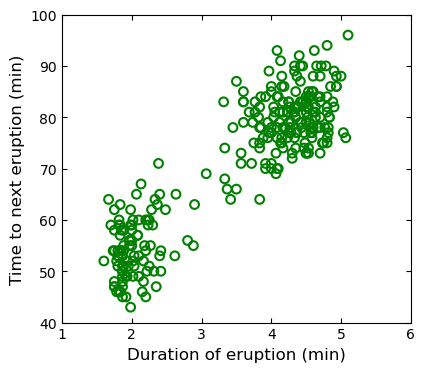

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
ax.scatter(data[:, 0], data[:, 1], facecolors='none', edgecolors='g', s=40, lw=1.5)
ax.set_xlim(1, 6)
ax.set_ylim(40, 100)
ax.set_xticks(np.arange(1, 7))
ax.set_yticks(np.arange(40, 110, 10))
ax.set_xlabel('Duration of eruption (min)', fontsize=12)
ax.set_ylabel('Time to next eruption (min)', fontsize=12)
ax.tick_params(labelsize=10, direction='in', which='both', right=True, top=True)
plt.show()

# Single Gaussian

## Maximum likelihood estimate

In [5]:
data.shape

(272, 2)

In [6]:
np.mean(data, axis=0)  # (2.121)

array([ 3.48778309, 70.89705882])

In [7]:
np.cov(data.T, ddof=0)  # note: np.cov assumes each row represents a feature, (2.122)

array([[  1.29793889,  13.92641885],
       [ 13.92641885, 184.14381488]])

## Using Gaussian mixture model (n = 1) for comparison

In [8]:
gm1 = GaussianMixture(n_components=1, n_init=10)
gm1.fit(data)

GaussianMixture(n_init=10)

In [9]:
gm1.means_

array([[ 3.48778309, 70.89705882]])

In [10]:
gm1.covariances_

array([[[  1.29793989,  13.92641885],
        [ 13.92641885, 184.14381588]]])

In [11]:
gm1.converged_

True

In [12]:
gm1.n_iter_

2

In [13]:
xx, yy = np.meshgrid(np.linspace(1, 6, 100), np.linspace(40, 100, 100))

In [14]:
Z1 = -gm1.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

# Gaussian mixture model (n = 2)

In [15]:
gm2 = GaussianMixture(n_components=2, n_init=10)
gm2.fit(data)

GaussianMixture(n_components=2, n_init=10)

In [16]:
gm2.weights_

array([0.64407255, 0.35592745])

In [17]:
gm2.means_

array([[ 4.28977944, 79.96953298],
       [ 2.03652149, 54.47986018]])

In [18]:
gm2.covariances_

array([[[ 0.16982046,  0.93871793],
        [ 0.93871793, 36.02497019]],

       [[ 0.06927449,  0.43627723],
        [ 0.43627723, 33.70493352]]])

In [19]:
gm2.converged_

True

In [20]:
gm2.n_iter_

4

In [21]:
Z2 = -gm2.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# Plot the results

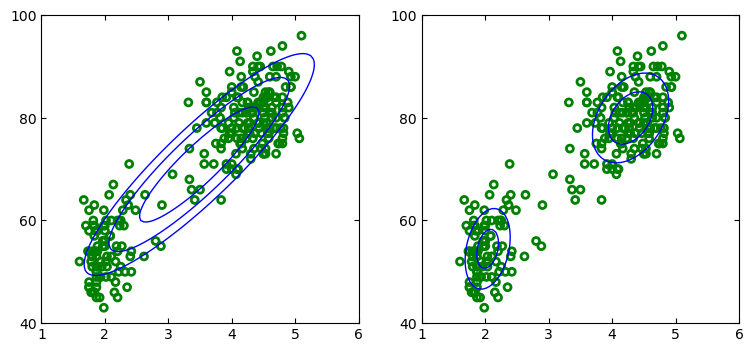

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].contour(xx, yy, Z1, levels=np.logspace(0.3, 0.7, 10), colors='b', linewidths=1)
ax[0].scatter(data[:, 0], data[:, 1], facecolors='none', edgecolors='g', s=25, lw=2)
ax[0].set_yticks(np.arange(40, 120, 20))
ax[0].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)

ax[1].contour(xx, yy, Z2, levels=np.logspace(0.3, 0.62, 5), colors='b', linewidths=1)
ax[1].scatter(data[:, 0], data[:, 1], facecolors='none', edgecolors='g', s=25, lw=2)
ax[1].set_yticks(np.arange(40, 120, 20))
ax[1].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)
plt.show()